<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/jj.csv')

In [4]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 <a list of 84 Text major ticklabel objects>)

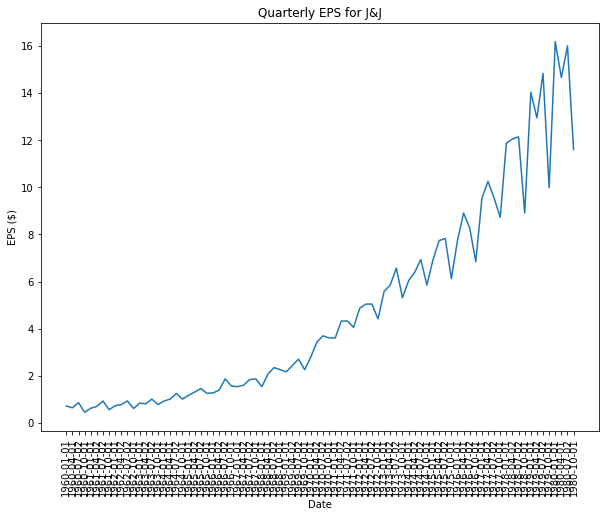

In [5]:
plt.plot(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)

In [6]:
data['data_tr_1'] = np.log(data['data'])
data['data_tr_1'] = data['data_tr_1'].diff()

In [7]:
data.head()

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684


Text(0.5, 1.0, 'Log difference of Quarterly EPS for J&J')

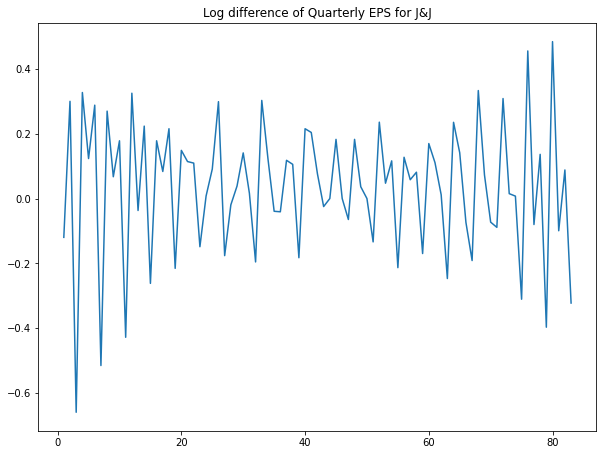

In [10]:
plt.plot(data['data_tr_1'][1:])
plt.title('Log difference of Quarterly EPS for J&J')

In [11]:
data['data_tr_2'] = data['data_tr_1'][1:].diff(4)

In [13]:
data.head(10)

,date,data,data_tr_1,data_tr_2
0,1960-01-01,0.71,NaN,NaN
1,1960-04-01,0.63,-0.119545,NaN
2,1960-07-02,0.85,0.299517,NaN
3,1960-10-01,0.44,-0.658462,NaN
4,1961-01-01,0.61,0.326684,NaN
5,1961-04-02,0.69,0.123233,0.242778
6,1961-07-02,0.92,0.287682,-0.011834
7,1961-10-01,0.55,-0.514455,0.144006
8,1962-01-01,0.72,0.269333,-0.057351
9,1962-04-02,0.77,0.067139,-0.056093


Text(0.5, 1.0, 'Log Difference Quarterly EPS for J&J (Seasonal Difference)')

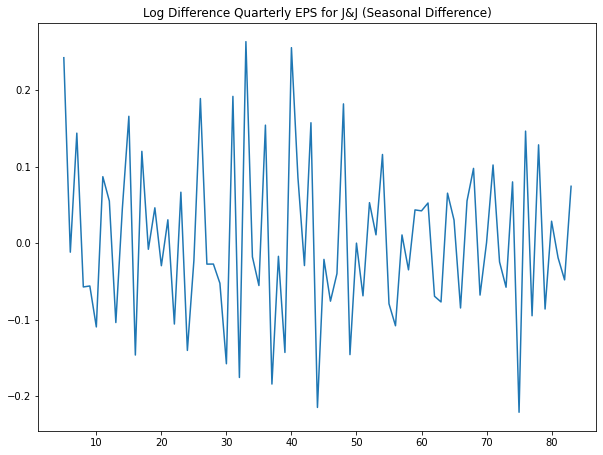

In [15]:
plt.plot(data['data_tr_2'])
plt.title('Log Difference Quarterly EPS for J&J (Seasonal Difference)')

In [16]:
ad_fuller_result = adfuller(data['data_tr_2'][5:])

In [17]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'P-value: {ad_fuller_result[1]}')

ADF Statistic: -6.630805109914263
P-value: 5.72157869513621e-09


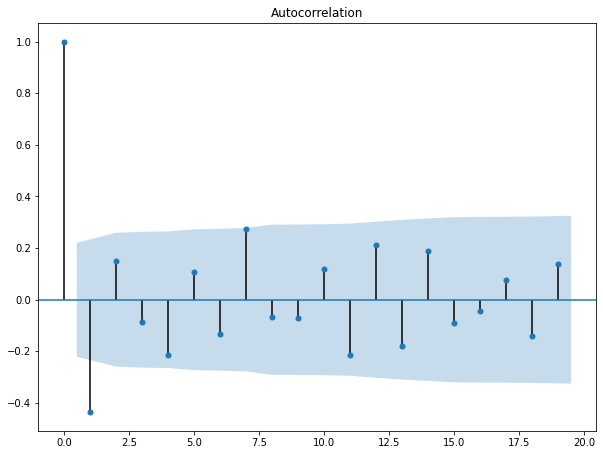

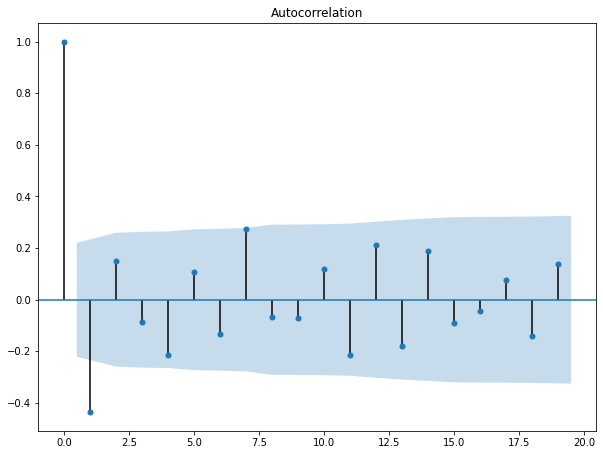

In [18]:
plot_acf(data['data_tr_2'][5:])

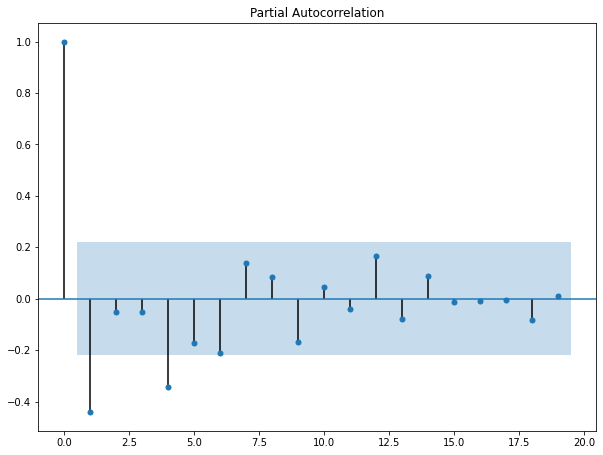

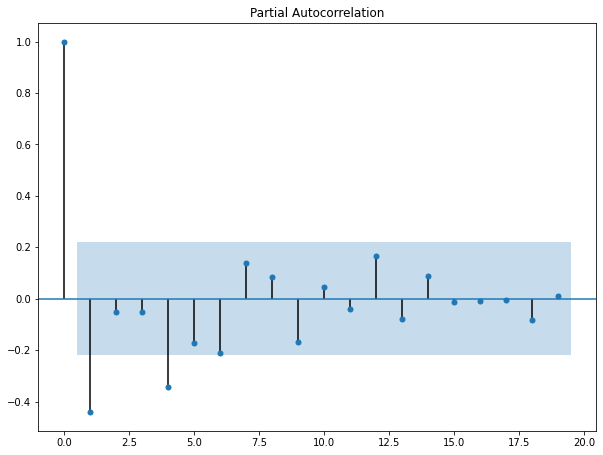

In [19]:
plot_pacf(data['data_tr_2'][5:])

In [20]:
def optimize_SARIMA(endog, parameters_list, d, D, s):

  """
  Returns a dataframe with parameters and corresponding AIC

  parameters_list - list with (p, q, P, Q) tuples
  endog - the observed variable
  d - integration order
  D - seasonal integration order
  s - length of a season
  """

  results = []

  for param in tqdm_notebook(parameters_list):

    try:
      model = SARIMAX(endog, \
                      order=(param[0], d, param[1]), \
                      seasonal_order=(param[2], D, param[3], s), \
                      simple_differencing=False).fit(disp=False)
    except:
      continue
    
    aic = model.aic

    results.append([param, aic])
  
  result_df = pd.DataFrame(results)
  result_df.columns = ['(p, q)x(P, Q)', 'AIC']
  result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

  return result_df

In [21]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [24]:
print(len(parameters_list))
print(parameters_list[:5])

256
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0)]


In [25]:
result_df = optimize_SARIMA(data['data'], parameters_list, 1, 1, 4)
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p, q)x(P, Q)",AIC
0,"(2, 3, 0, 0)",92.588733
1,"(2, 3, 1, 0)",93.976830
2,"(2, 3, 0, 1)",94.131656
3,"(3, 2, 0, 3)",94.200973
4,"(3, 3, 0, 0)",94.468557
...,...,...
251,"(0, 0, 3, 1)",144.211575
252,"(0, 0, 3, 3)",145.086453
253,"(0, 0, 2, 3)",145.465209
254,"(0, 0, 3, 2)",145.563923


In [26]:
best_model = SARIMAX(data['data'], order=(2, 1, 3), seasonal_order=(0, 1, 0, 4), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                                 Statespace Model Results                                
Dep. Variable:                              data   No. Observations:                   84
Model:             SARIMAX(2, 1, 3)x(0, 1, 0, 4)   Log Likelihood                 -40.294
Date:                           Tue, 16 Aug 2022   AIC                             92.589
Time:                                   13:27:24   BIC                            106.805
Sample:                                        0   HQIC                            98.284
                                            - 84                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4865      0.116    -12.790      0.000      -1.714      -1.259
ar.L2         -0.7924      0.131     -6.035

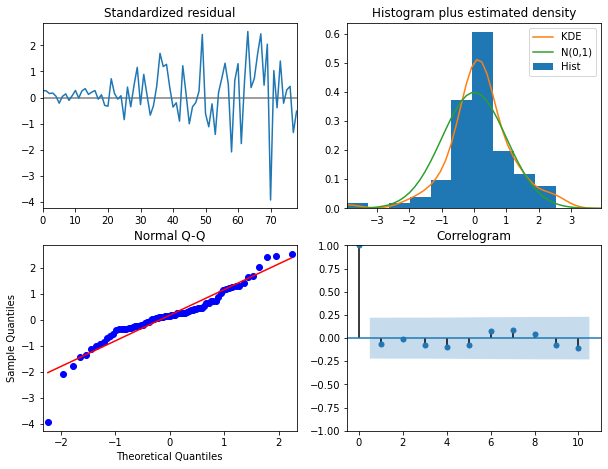

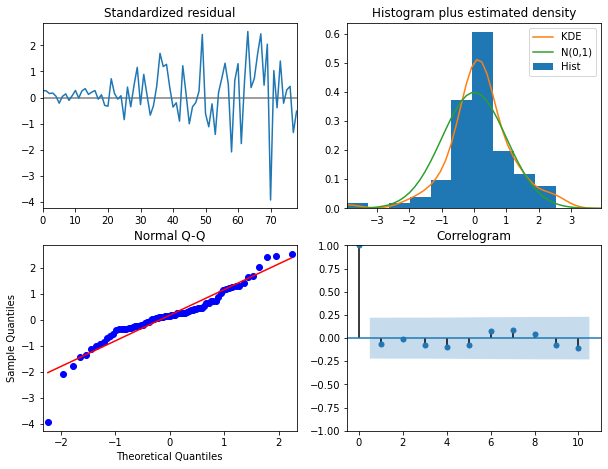

In [27]:
res.plot_diagnostics()

In [28]:
n_forecast = 8
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

[Text(0.5, 1.0, 'Forecast of J&J Quarterly EPS')]

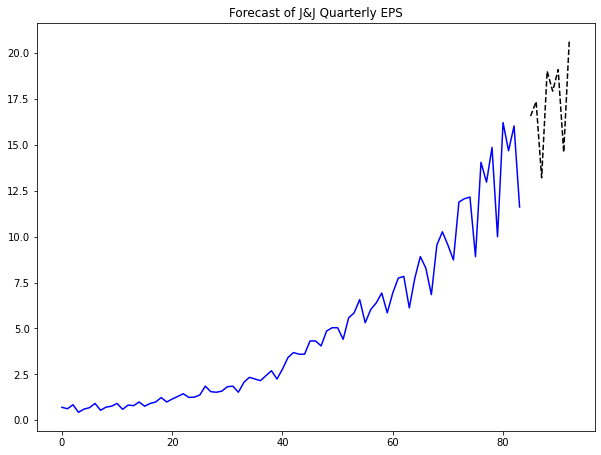

In [30]:
fig, ax = plt.subplots()
ax.plot(data['data'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')
ax.set(title='Forecast of J&J Quarterly EPS')

In [31]:
data['model'] = predict.predicted_mean

In [33]:
data.head(10)

,date,data,data_tr_1,data_tr_2,model
0,1960-01-01,0.71,NaN,NaN,0.000000
1,1960-04-01,0.63,-0.119545,NaN,0.710000
2,1960-07-02,0.85,0.299517,NaN,0.630000
3,1960-10-01,0.44,-0.658462,NaN,0.850000
4,1961-01-01,0.61,0.326684,NaN,0.795000
5,1961-04-02,0.69,0.123233,0.242778,0.530000
6,1961-07-02,0.92,0.287682,-0.011834,0.804916
7,1961-10-01,0.55,-0.514455,0.144006,0.482519
8,1962-01-01,0.72,0.269333,-0.057351,0.645596
9,1962-04-02,0.77,0.067139,-0.056093,0.748452


In [34]:
mse = mean_squared_error(data['data'], data['model'])

In [35]:
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.15613942412399825


Text(0.5, 1.0, 'J&J Quarterly EPS')

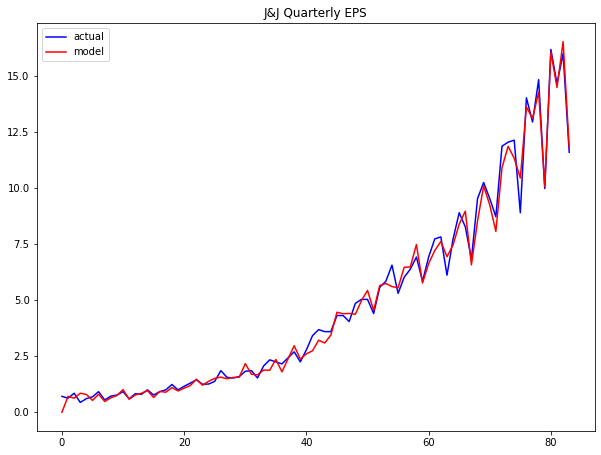

In [36]:
plt.plot(data['data'], color='blue', label='actual')
plt.plot(data['model'], color='red', label='model')
plt.legend(loc='best')
plt.title('J&J Quarterly EPS')